<a href="https://colab.research.google.com/github/ashirm1999/SML-Project/blob/main/Simran_Goindani_Ashir_Mehta_DS5220_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import keras
from keras.datasets import cifar10
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.metrics as skm
from sklearn import svm
import os, time
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

## Model Development

### SVM with different Kernel

#### Loading Data

In [ ]:
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
#Loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#Splitting the data into validation
x_val = x_train[49000:, :].astype(np.float)
#Converting target variable to 1d array
y_val = np.squeeze(y_train[49000:, :])
x_train = x_train[:49000, :].astype(np.float)
y_train = np.squeeze(y_train[:49000, :])
y_test = np.squeeze(y_test)
x_test = x_test.astype(np.float)

170508288/170498071 [==============================] - 3s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Deprec

In [ ]:
print("Train image shape " , x_train.shape)
print("Train label shape :", y_train.shape)
print("Validate image shape :", x_val.shape)
print("Validate label shape : ", y_val.shape)
print("Test image shape : ", x_test.shape)
print("Test label shape : ", y_test.shape)

Train image shape  (49000, 32, 32, 3)
Train label shape : (49000,)
Validate image shape : (1000, 32, 32, 3)
Validate label shape :  (1000,)
Test image shape :  (10000, 32, 32, 3)
Test label shape :  (10000,)


#### Reshaping and Normalizing Data

In [ ]:
print(x_train.shape)
print(y_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0], -1)) 
x_val = np.reshape(x_val, (x_val.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

#Normalizing the data
x_train = ((x_train / 255) * 2) - 1 

(49000, 32, 32, 3)
(49000,)


In [ ]:
#Selecting a smaller subset of data to train
x_train = x_train[:3000,:]
y_train = y_train[:3000]
print(y_train)
print(x_train.shape)
print(y_train.shape)

[6 9 9 ... 6 6 4]
(3000, 3072)
(3000,)


#### SVM Model

In [ ]:
#Created a function that takes model and test data as input and returns the test accuracy
def svm_models_acc(model, x_test, y_test):
  
  return np.mean(model.predict(x_test) == y_test)

In [ ]:
# Created a common SVM model for all the types of kernel and without kernel
def svm_models(x_train, y_train, x_val, y_val, x_test, y_test, kernel, c):
  train_acc, val_acc = [], []
  temp_df = pd.DataFrame()

  #Checking if kernel is rbf and then creating a model with an additional parameter gamma for kernel = rbf
  if kernel == "rbf":
    #Fitting the model for different values of regularization parameter
    for i in c:
      svm_model = svm.SVC(probability = False, kernel = kernel, C = i, gamma = 'auto')
      svm_model.fit(x_train, y_train)

      ypred_train = svm_model.predict(x_train)
      acc_train = np.mean(ypred_train == y_train)
      train_acc.append(acc_train * 100)

      ypred_test = svm_model.predict(x_val)
      acc_test = np.mean(ypred_test == y_val)
      val_acc.append(acc_test * 100)

      #When regularization parameter is 1 the model achieves best accuracy and it does not overfit so storing the test accuracy when C = 1
      if i == 1:
        test_acc = svm_models_acc(svm_model, x_test, y_test)

    temp_df['Regularization Parameter'] = c
    temp_df['Training Accuracy'] = train_acc
    temp_df['Validation Accuracy'] = val_acc
        
    plt.plot(c, train_acc,'.-',color = 'red')
    plt.plot(c, val_acc,'.-',color = 'orange')
    plt.xlabel('c')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs c for training and test data with " + str(kernel) + " kernel")
    plt.legend(["train", "val"])
    plt.grid()
    plt.show()

    return test_acc, temp_df

  #Checking if the argument is given no kernel then creating a svm model without a kernel
  elif kernel == 'No kernel':
    #Fitting the model for different values of regularization parameter
    for i in c:
      svm_model = svm.SVC(probability = False, C = i)
      svm_model.fit(x_train, y_train)

      ypred_train = svm_model.predict(x_train)
      acc_train = np.mean(ypred_train == y_train)
      train_acc.append(acc_train * 100)

      ypred_test = svm_model.predict(x_val)
      acc_test = np.mean(ypred_test == y_val)
      val_acc.append(acc_test * 100)

      #When regularization parameter is 1 the model achieves best accuracy and it does not overfit so storing the test accuracy when C = 1
      if i == 1:
        test_acc = svm_models_acc(svm_model, x_test, y_test)

    temp_df['Regularization Parameter'] = c
    temp_df['Training Accuracy'] = train_acc
    temp_df['Validation Accuracy'] = val_acc

    plt.plot(c, train_acc,'.-',color = 'red')
    plt.plot(c, val_acc,'.-',color = 'orange')
    plt.xlabel('c')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs c for training and test data without kernel")
    plt.legend(["train", "val"])
    plt.grid()
    plt.show()

    return test_acc, temp_df

  #If the kernel is linear or poly then defining the same model with different kernel that is passed as parameters in the function.
  else:
    #Fitting the model for different values of regularization parameter
    for i in c:
      svm_model = svm.SVC(probability = False, kernel = kernel, C = i)
      svm_model.fit(x_train, y_train)

      ypred_train = svm_model.predict(x_train)
      acc_train = np.mean(ypred_train == y_train)
      train_acc.append(acc_train * 100)

      ypred_test = svm_model.predict(x_val)
      acc_test = np.mean(ypred_test == y_val)
      val_acc.append(acc_test * 100)

      #When regularization parameter is 1 the model achieves best accuracy and it does not overfit so storing the test accuracy when C = 1
      if i == 1:
        test_acc = svm_models_acc(svm_model, x_test, y_test)

    temp_df['Regularization Parameter'] = c
    temp_df['Training Accuracy'] = train_acc
    temp_df['Validation Accuracy'] = val_acc

    plt.plot(c, train_acc, '.-', color = 'red')
    plt.plot(c, val_acc, '.-', color = 'orange')
    plt.xlabel('c')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs c for training and test data with " + str(kernel) + " kernel")
    plt.legend(["train", "val"])
    plt.grid()
    plt.show()

    return test_acc, temp_df

#### Model - 1 SVM without Kernel

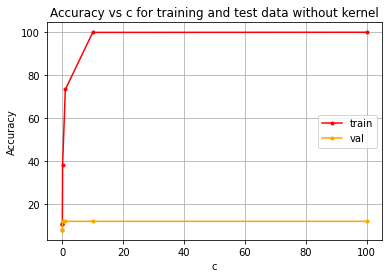

In [ ]:
c_svm = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
#Calling the svm model function with No kernel as a parameter to create a simple svm model
test_acc_svm, temp_df = svm_models(x_train, y_train, x_val, y_val, x_test, y_test, 'No kernel', c_svm)

In [ ]:
#Printing the train and validation accuracy for different values of c
temp_df

,Regularization Parameter,Training Accuracy,Validation Accuracy
0,0.0001,10.733333,7.9
1,0.0010,10.733333,7.9
2,0.0100,10.733333,7.9
3,0.1000,38.200000,11.9
4,1.0000,73.333333,11.9
5,10.0000,99.933333,11.9
6,100.0000,100.000000,11.9


#### Model - 2 SVM with Linear Kernel

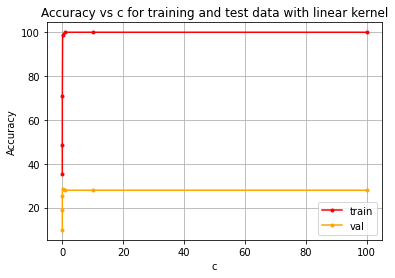

In [ ]:
c_svm_linear = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
#Calling the svm model function and passing linear as parameter to create an svm model with linear kernel and passing various regularization parameter.
test_acc_linear, temp_df = svm_models(x_train, y_train, x_val, y_val, x_test, y_test, 'linear', c_svm_linear)

In [ ]:
#Printing the train and validation accuracy for different values of c
temp_df

,Regularization Parameter,Training Accuracy,Validation Accuracy
0,0.0001,35.466667,9.8
1,0.0010,48.466667,18.8
2,0.0100,70.933333,25.3
3,0.1000,98.966667,28.6
4,1.0000,100.000000,27.9
5,10.0000,100.000000,27.9
6,100.0000,100.000000,27.9


#### Model - 3 SVM with Polynomial Kernel

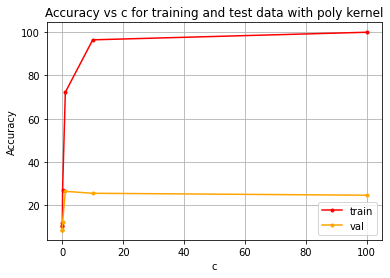

In [ ]:
c_svm_poly = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
#Calling the svm model function and passing poly as parameter to create an svm model with linear kernel and passing various regularization parameter.
test_acc_poly, temp_df = svm_models(x_train, y_train, x_val, y_val, x_test, y_test, 'poly', c_svm_poly)

In [ ]:
#Printing the train and validation accuracy for different values of c
temp_df

,Regularization Parameter,Training Accuracy,Validation Accuracy
0,0.0001,10.733333,8.7
1,0.0010,10.733333,8.7
2,0.0100,12.066667,8.7
3,0.1000,27.233333,12.5
4,1.0000,72.200000,26.5
5,10.0000,96.366667,25.6
6,100.0000,99.866667,24.7


#### Model - 4 SVM with RBF Kernel

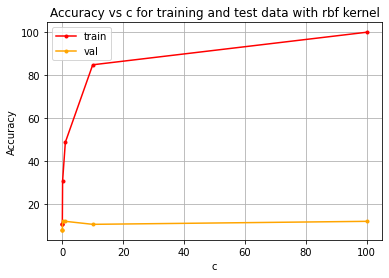

In [ ]:
c_svm_rbf = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
#Calling the svm model function and passing rbf as parameter to create an svm model with linear kernel and passing various regularization parameter.
test_acc_rbf, temp_df = svm_models(x_train, y_train, x_val, y_val, x_test, y_test, 'rbf', c_svm_poly)

In [ ]:
#Printing the train and validation accuracy for different values of c
temp_df

,Regularization Parameter,Training Accuracy,Validation Accuracy
0,0.0001,10.733333,7.9
1,0.0010,10.733333,7.9
2,0.0100,10.733333,7.9
3,0.1000,30.733333,11.9
4,1.0000,48.733333,11.9
5,10.0000,84.833333,10.5
6,100.0000,100.000000,11.9


### Model - 5 DNN without CNN

In [ ]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

print()
print('Training Data shape:', x_train.shape)
print("Number of Training Samples", x_train.shape[0])
print("Number of Testing Samples", x_test.shape[0])

# Converting to Categorical Classes
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


Training Data shape: (50000, 32, 32, 3)
Number of Training Samples 50000
Number of Testing Samples 10000


#### Pre - Processing

In [ ]:
#Splitting the data into train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42) 

In [ ]:
print("Number of Training Samples", x_train.shape[0])
print("Number of Validation Samples", x_val.shape[0])
print("Number of Testing Samples", x_test.shape[0])

Number of Training Samples 37500
Number of Validation Samples 12500
Number of Testing Samples 10000


In [ ]:
#Scaling the data for training and testing the model
X_train_scaled = x_train / 255
X_val_scaled = x_val / 255
X_test_scaled = x_test / 255

In [ ]:
# Creating Neural Network without CNN
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (32, 32, 3)),
        keras.layers.Dense(3000, activation = 'relu'),
        keras.layers.Dense(1000, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ])

#Compiling the model with Stochastic Gradient Descent as optimizer and categorical cross entropy loss and metrics = accuracy
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Training the model for 25 epochs along with validation data
history = model.fit(X_train_scaled, y_train, epochs = 25, validation_data = (X_val_scaled, y_val))

Epoch 1/25
1172/1172 [==============================] - 15s 11ms/step - loss: 1.8470 - accuracy: 0.3418 - val_loss: 1.6987 - val_accuracy: 0.3996
Epoch 2/25
1172/1172 [==============================] - 12s 10ms/step - loss: 1.6598 - accuracy: 0.4146 - val_loss: 1.6656 - val_accuracy: 0.4089
Epoch 3/25
1172/1172 [==============================] - 13s 11ms/step - loss: 1.5783 - accuracy: 0.4421 - val_loss: 1.6007 - val_accuracy: 0.4242
Epoch 4/25
1172/1172 [==============================] - 13s 11ms/step - loss: 1.5210 - accuracy: 0.4651 - val_loss: 1.6423 - val_accuracy: 0.4105
Epoch 5/25
1172/1172 [==============================] - 12s 10ms/step - loss: 1.4724 - accuracy: 0.4797 - val_loss: 1.5445 - val_accuracy: 0.4506
Epoch 6/25
1172/1172 [==============================] - 12s 10ms/step - loss: 1.4288 - accuracy: 0.5016 - val_loss: 1.4753 - val_accuracy: 0.4814
Epoch 7/25
1172/1172 [==============================] - 12s 10ms/step - loss: 1.3910 - accuracy: 0.5122 - val_loss: 1.4660 -

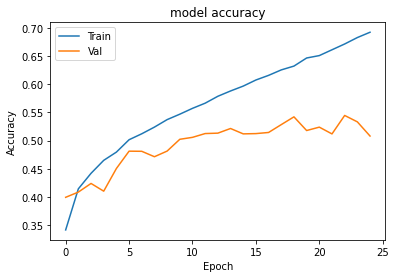

In [ ]:
#Plotting the Training and Validation Accuracy vs # of epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

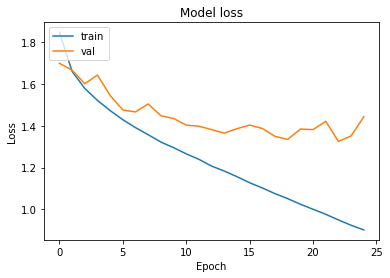

In [ ]:
#Plotting the Training and Validation Loss vs # of epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [ ]:
#Testing the model on the test data
test_loss_wo_cnn, test_accuracy_wo_cnn = model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4368 - accuracy: 0.5066


### Model - 6 DNN with CNN

In [ ]:
import tensorflow as tf

In [ ]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

print()
print('Training Data shape:', x_train.shape)
print("Number of Training Samples", x_train.shape[0])
print("Number of Testing Samples", x_test.shape[0])


Training Data shape: (50000, 32, 32, 3)
Number of Training Samples 50000
Number of Testing Samples 10000


In [ ]:
#Splitting the data into train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42) 

In [ ]:
#Scaling the data for training the model
X_train_scaled = x_train / 255
X_val_scaled = x_val / 255
X_test_scaled = x_test / 255

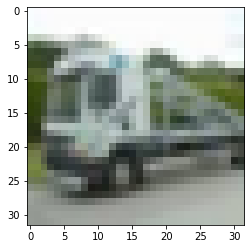

In [ ]:
#Plotting a random test image
plt.imshow(x_test[217])

In [ ]:
#Creating a neural network with Convolution Layers
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model_cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model_cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
model_cnn.add(tf.keras.layers.Dense(units = 128,activation='relu'))
model_cnn.add(tf.keras.layers.Dense(units = 10,activation='softmax'))

In [ ]:
#Printing the model architecture
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
#Compiling the model with Adam as optimizer and sparse categorical cross entropy loss and metrics = sparse categorical accuracy
model_cnn.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam", metrics = ["sparse_categorical_accuracy"])

In [ ]:
#Training the model for 25 epochs along with validation data
history1 = model_cnn.fit(X_train_scaled, y_train, epochs = 25, validation_data = (X_val_scaled, y_val))

Epoch 1/25
1172/1172 [==============================] - 30s 17ms/step - loss: 1.5332 - sparse_categorical_accuracy: 0.4387 - val_loss: 1.2095 - val_sparse_categorical_accuracy: 0.5660
Epoch 2/25
1172/1172 [==============================] - 18s 15ms/step - loss: 1.1192 - sparse_categorical_accuracy: 0.6017 - val_loss: 0.9728 - val_sparse_categorical_accuracy: 0.6546
Epoch 3/25
1172/1172 [==============================] - 19s 16ms/step - loss: 0.9403 - sparse_categorical_accuracy: 0.6657 - val_loss: 0.8558 - val_sparse_categorical_accuracy: 0.6990
Epoch 4/25
1172/1172 [==============================] - 19s 16ms/step - loss: 0.8351 - sparse_categorical_accuracy: 0.7032 - val_loss: 0.7831 - val_sparse_categorical_accuracy: 0.7248
Epoch 5/25
1172/1172 [==============================] - 20s 17ms/step - loss: 0.7543 - sparse_categorical_accuracy: 0.7337 - val_loss: 0.7419 - val_sparse_categorical_accuracy: 0.7426
Epoch 6/25
1172/1172 [==============================] - 19s 17ms/step - loss: 0.

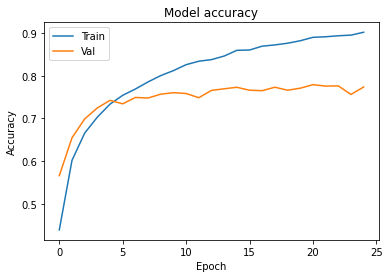

In [ ]:
#Plotting the Training and Validation Accuracy vs # of epochs
plt.plot(history1.history['sparse_categorical_accuracy'])
plt.plot(history1.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

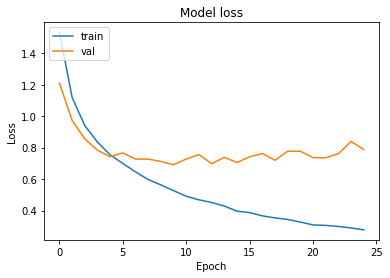

In [ ]:
#Plotting the Training and Validation Loss vs # of epochs
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [ ]:
#Testing the model on the test data
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.8099 - sparse_categorical_accuracy: 0.7700


# Model Evalution

In [ ]:
#Creating an empty dataframe to compare the results of all models
df = pd.DataFrame()

In [ ]:
#Creating Model Name Column and appending all the proposed model names
df['Model Name'] = ['SVM without Kernel', 'SVM With Linear Kernel', 'SVM With Poly Kernel', 'SVM With RBF Kernel', 'Neural Network without CNN', 'Neural Network with CNN']

In [ ]:
#Creating the Test Accuracy column and storing the accuracy on test data for all the 6 proposed models
df['Test Accuracy'] = [test_acc_svm * 100, test_acc_linear * 100, test_acc_poly * 100, test_acc_rbf * 100, test_accuracy_wo_cnn * 100,  test_accuracy_cnn * 100 ]

In [ ]:
df

,Model Name,Test Accuracy
0,SVM without Kernel,10.000000
1,SVM With Linear Kernel,26.090000
2,SVM With Poly Kernel,25.560000
3,SVM With RBF Kernel,10.000000
4,Neural Network without CNN,50.660002
5,Neural Network with CNN,76.999998


Conclusion : From the above dataframe we can see that the Supervised Model such as SVM with different kernels give low accuracy ranging from 10 to 26% on test data which is low compared to neural networks with and without CNN. Moreover, the best model is the model with CNN layer having an accuracy of 77% on the test data.